In [5]:
from google.colab import files
uploaded = files.upload()

Saving mushrooms.csv to mushrooms (1).csv


In [39]:
import numpy as np #linear algebra
import pandas as pd #data processing
import matplotlib.pyplot as plt

from subprocess import check_output
print(check_output(["ls","../"]).decode("utf8"))
mushrooms=pd.read_csv('mushrooms.csv')

bin
boot
content
datalab
dev
etc
home
lib
lib32
lib64
media
mnt
opt
proc
root
run
sbin
srv
swift
sys
tensorflow-2.0.0
tmp
tools
usr
var



In [24]:
mushrooms.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


1.Pick two features for classification (cap colr,odor)
2. Run some statistical analysis
3.Assign numerical values to the letter values in order to feed the Logistic Regression algo.

In [25]:
mushrooms.shape

(8124, 23)

In [26]:
mushrooms.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


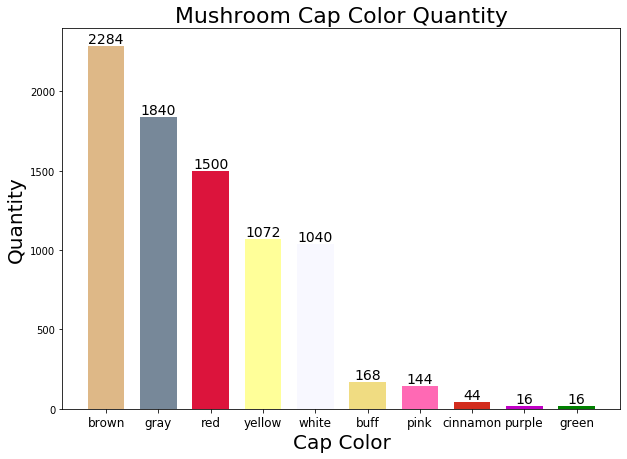

In [33]:
#Visualization
#Obtain total number of mushrooms for each 'cap-color' (Entire DataFrame)
cap_colors=mushrooms['cap-color'].value_counts()
m_height=cap_colors.values.tolist() #Provides numerical values
cap_colors.axes #Provides row labels
cap_color_labels=cap_colors.axes[0].tolist() #Converts index object to list

#=====PLOT Preparations and Plotting====#
ind=np.arange(10) # the x loactions for the groups
width=0.7 #the width of the bars
colors=['#DEB887','#778899','#DC143C','#FFFF99','#f8f8ff','#F0DC82','#FF69B4','#D22D1E','#C000C5','g']
#FFFF0
fig,ax=plt.subplots(figsize=(10,7))
mushroom_bars=ax.bar(ind,m_height,width,color=colors)

#Ass some text for labels, title and axes ticks
ax.set_xlabel("Cap Color",fontsize=20)
ax.set_ylabel('Quantity',fontsize=20)
ax.set_title('Mushroom Cap Color Quantity',fontsize=22)
ax.set_xticks(ind) #Positioning on the x axis
ax.set_xticklabels(('brown','gray','red','yellow','white','buff','pink','cinnamon','purple','green'),fontsize=12)

#Auto-labels the number of mushrooms for each bar color.
def autolabel(rects,fontsize=14):
  """
  Attach a text label above each bar displaying its height
  """
  for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1*height,'%d' % int(height),
                ha='center', va='bottom',fontsize=fontsize)
autolabel(mushroom_bars)        
plt.show() #Display bars. 


In [0]:
#Following bar chart shows the # of mushrooms which are edible or poisonous based on cap-color

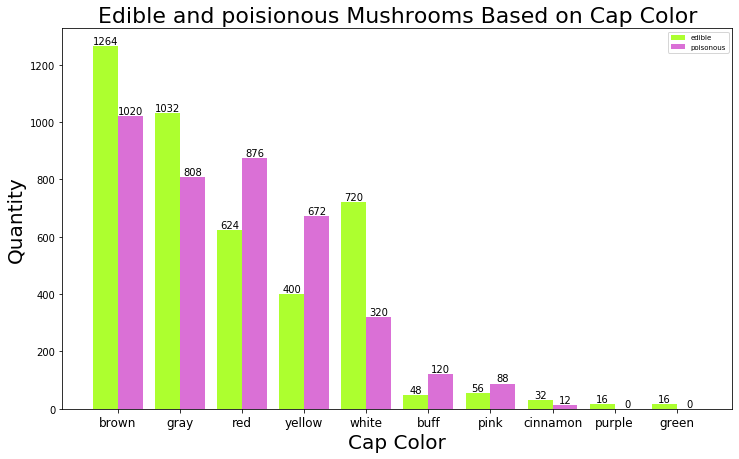

[1264, 1032, 624, 400, 720, 48, 56, 32, 16, 16]
[1020, 808, 876, 672, 320, 120, 88, 12, 0, 0]


In [35]:
poisonous_cc=[] #Poisonous color cap list
edible_cc=[] #Edible color cap list
for capColor in cap_color_labels:
  size=len(mushrooms[mushrooms['cap-color']==capColor].index)
  edibles=len(mushrooms[(mushrooms['cap-color']==capColor)&(mushrooms['class']=='e')].index)
  edible_cc.append(edibles)
  poisonous_cc.append(size-edibles)

#===PLOT Preparations and Plotting===#
width=0.40
fig,ax=plt.subplots(figsize=(12,7))
edible_bars=ax.bar(ind,edible_cc,width,color='#ADFF2F')
poison_bars=ax.bar(ind+width,poisonous_cc,width,color='#DA70D6')

#Labels,titles and axes ticks
ax.set_xlabel("Cap Color",fontsize=20)
ax.set_ylabel('Quantity',fontsize=20)
ax.set_title('Edible and poisionous Mushrooms Based on Cap Color',fontsize=22)
ax.set_xticks(ind + width / 2) # Positioning on the x axis
ax.set_xticklabels(('brown','gray','red','yellow','white','buff','pink','cinnamon','purple','green'),fontsize=12)
ax.legend((edible_bars,poison_bars),('edible','poisonous'),fontsize=7)
autolabel(edible_bars,10)
autolabel(poison_bars,10)
plt.show()
print(edible_cc)
print(poisonous_cc)


In [36]:
'The next bar chart shows the number of mushrooms based on "odor" '

'The next bar chart shows the number of mushrooms based on "odor" '

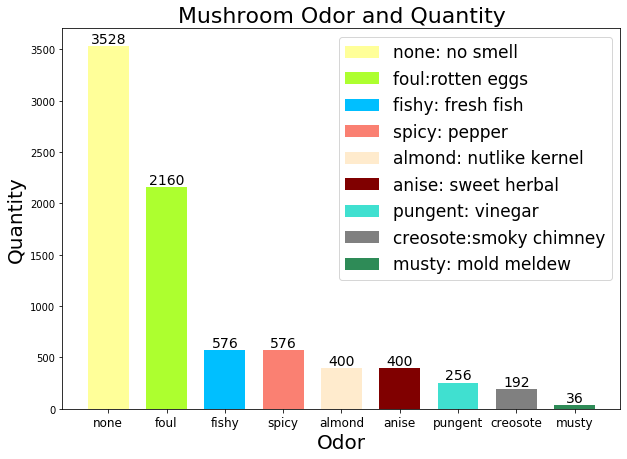

In [41]:
#Visualizing total number of mushrooms for each 'odor'
odors=mushrooms['odor'].value_counts()
odor_height = odors.values.tolist() # Provides numerical values
odor_labels = odors.axes[0].tolist() #Converts index labels object to list

#===PLOT Preparations and Plotting===#
width=0.7
ind=np.arange(9)
colors=['#FFFF99','#ADFF2F','#00BFFF','#FA8072','#FFEBCD','#800000','#40E0D0','#808080','#2E8B57']

fig,ax=plt.subplots(figsize=(10,7))
odor_bars=ax.bar(ind,odor_height,width,color=colors)

#labels,title and axes ticks
ax.set_xlabel("Odor",fontsize=20)
ax.set_ylabel('Quantity',fontsize=20)
ax.set_title('Mushroom Odor and Quantity',fontsize=22)
ax.set_xticks(ind) #Positioning on the x axis
ax.set_xticklabels(('none','foul','fishy','spicy','almond','anise','pungent','creosote','musty'),fontsize=12)
ax.legend(odor_bars,['none: no smell','foul:rotten eggs','fishy: fresh fish','spicy: pepper','almond: nutlike kernel','anise: sweet herbal','pungent: vinegar','creosote:smoky chimney','musty: mold meldew'],fontsize=17)
autolabel(odor_bars)
plt.show() #Displays bar

In [0]:
#Following bar: Number of mushrooms which are edible|poisonous based on odor

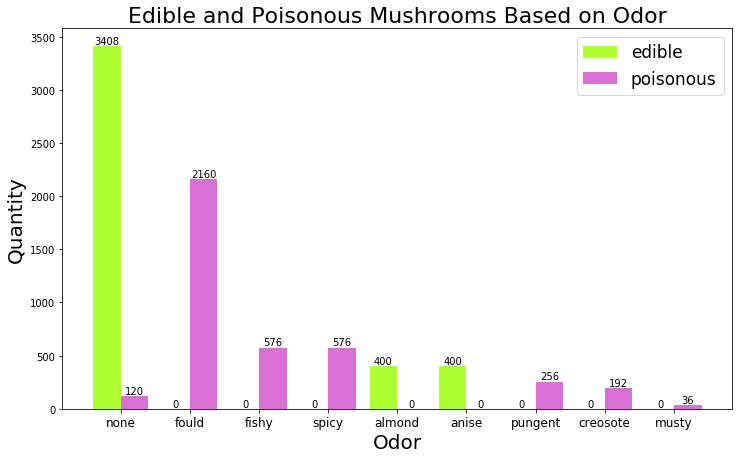

[3408, 0, 0, 0, 400, 400, 0, 0, 0]
[120, 2160, 576, 576, 0, 0, 256, 192, 36]


In [44]:
poisonous_od=[] #Poisonous odor list
edible_od=[] #Edible odor list
for odor in odor_labels:
  size=len(mushrooms[mushrooms['odor']==odor].index)
  edibles=len(mushrooms[(mushrooms['odor']==odor)&(mushrooms['class']=='e')].index)
  edible_od.append(edibles)
  poisonous_od.append(size-edibles)

#===PLOT Preparations and Plotting===#
width=0.40
fig,ax=plt.subplots(figsize=(12,7))
edible_bars=ax.bar(ind,edible_od,width,color='#ADFF2F')
poison_bars=ax.bar(ind+width,poisonous_od,width,color='#DA70D6')

#text,labels,titles and axes ticks
ax.set_xlabel("Odor",fontsize=20)
ax.set_ylabel('Quantity',fontsize=20)
ax.set_title('Edible and Poisonous Mushrooms Based on Odor',fontsize=22)
ax.set_xticks(ind+width/2) #Positioning on the x axis
ax.set_xticklabels(('none','fould','fishy','spicy','almond','anise','pungent','creosote','musty'),fontsize=12)
ax.legend((edible_bars,poison_bars),('edible','poisonous'),fontsize=17)
autolabel(edible_bars,10)
autolabel(poison_bars,10)
plt.show()
print(edible_od)
print(poisonous_od)

Observations:

According to my expectations, at least some of the " not nose friendly" mushrooms could be edible. However, the above contradicts that thought. All smelly and stingy mushrooms are poisonous. TO my surprise all the almond and anise mushrooms ar edible. Finally, we must be careful for mushrooms with no smell, there seems to be a small chance of getting poisoned.

Pie Chart: Show the type of mushroom population

Dounle Pie Chart: Show edibles and poisonous percentages of mushroom population types

[4040, 1712, 1248, 400, 384, 340]


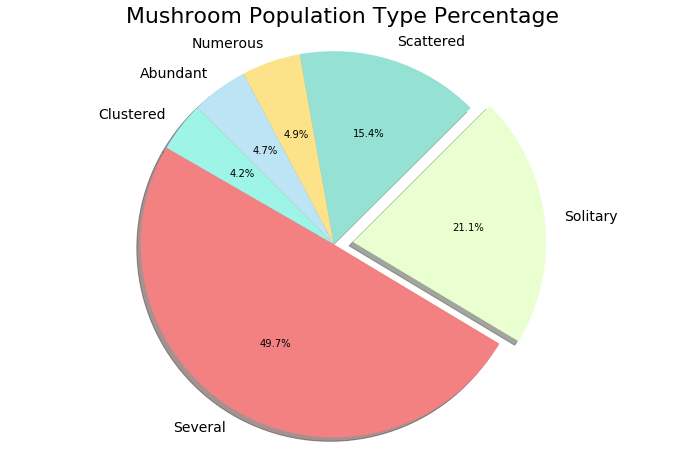

In [47]:
#Extracting population types and its values for single Pie Chart
populations=mushrooms['population'].value_counts()
pop_size=populations.values.tolist() #Provides numercal values
pop_types=populations.axes[0].tolist() #Converts index labels objext to list
print(pop_size)

#Data to plot
pop_labels='Several','Solitary','Scattered','Numerous','Abundant','Clustered'
colors=['#F38181','#EAFFD0','#95E1D3','#FCE38A','#BDE4F4','#9EF4E6']
explode=(0,0.1,0,0,0,0) #Explode 1st slice
fig=plt.figure(figsize=(12,8))

#Plotting
plt.title('Mushroom Population Type Percentage',fontsize=22)
patches,texts,autotexts=plt.pie(pop_size,explode=explode,labels=pop_labels,colors=colors,autopct='%1.1f%%',shadow=True,startangle=150)
for text,autotext in zip(texts,autotexts):
  text.set_fontsize(14)
plt.axis('equal')
plt.show()
        

In [0]:
#Plotting double Pie charts
poisonous_pop=[] # Poisonous population type list
edible_pop[] #Edible population type list
for pop in pop_types:
  size=len(mushrooms[mushrooms['population']==pop].index)
  edibles=len(mushrooms[(mushrooms['population']==pop)&(mushrooms['class']=='e')].index)
  edible.pop.append(edibles) #For Edibles
  poisonous_pop.append(size-edibles) #Poisonous
  combine_ed_poi=[]
  for i in range(0,len(edible_pop)): #Combines both edible and poisonous in a single list.
    combine_ed_poi.append(edible_pop[i])
    combine_ed_poi.append(poisonous_pop[i])
  #Print edible_pop and Print poisonous_pop and print combine_ed_poi

  #Preparations for Double pie chart.
  fig=plt.sunplots(figsize(13,))